In [1]:
%pwd

'/manitou/pmg/projects/bys2107/cp-fnr'

In [2]:
import pandas as pd
import numpy as np

In [3]:
import torch

from utils import *
from train import *

In [4]:
def model_train_suite(params):
    SEED = params["SEED"]
    model_type = params["model_type"]
    hidden_size = params["hidden_size"]
    batch_size = params["batch_size"]
    num_epochs = params["num_epochs"]
    learning_rate = params["learning_rate"]
    save = params["save"]
    verbose = params["verbose"]
    
    X_train, Y_train, X_calibration, Y_calibration, X_test, Y_test = load_data_splits(SEED=SEED)

    input_size = len(X_train[0])
    output_size = len(Y_train[0])
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    print("Using device {}".format(device))
    print("Params: \n{}".format(params))

    model = get_model(model_type, input_size, hidden_size, output_size)
    model = model.to(device)

    train_loader = load_data(X_train, Y_train, device, batch_size)
    val_loader = load_data(X_calibration, Y_calibration, device, batch_size)
    test_loader = load_data(X_test, Y_test, device, batch_size)

    print(model)

    hist = train_model(model, train_loader, val_loader, num_epochs=num_epochs, learning_rate=learning_rate, save=save, verbose=verbose)

    res = {}
    print("\t[Evaluation on training data...]")
    pred_raw = model(torch.tensor(X_train, dtype=torch.float32).to(device))
    pred = torch.round(pred_raw)
    res["train_metrics"] = eval_metrics(Y_train, pred.to("cpu").detach().numpy())
    
    print("\t[Evaluation on calibration data...]")
    pred_raw = model(torch.tensor(X_calibration, dtype=torch.float32).to(device))
    pred = torch.round(pred_raw)
    res["cal_metrics"] = eval_metrics(Y_calibration, pred.to("cpu").detach().numpy())
    
    print("\t[Evaluation on testing data...]")
    pred_raw = model(torch.tensor(X_test, dtype=torch.float32).to(device))
    pred = torch.round(pred_raw)
    res["test_metrics"] = eval_metrics(Y_test, pred.to("cpu").detach().numpy())

    plotTrainValLosses(hist)
    
    return model, hist, res

Loaded data splits
X_train shape: (566, 60936)
Y_train shape: (566, 4)
X_calibration shape: (121, 60936)
Y_calibration shape: (121, 4)
X_test shape: (122, 60936)
Y_test shape: (122, 4)
Using device cuda
Params: 
{'SEED': 1000, 'model_type': 'mlp-mlc-sm', 'hidden_size': 256, 'batch_size': 32, 'num_epochs': 150, 'learning_rate': 5e-06, 'save': True, 'verbose': False}
MlpMlcSm(
  (fc1): Linear(in_features=60936, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)
saving to ckpts/mlp-mlc-sm-2024-04-18-23:44.pth
	[Evaluation on training data...]
Hamming Loss: 0.1351590106007067
Accuracy Score: 0.5777385159010601
F1 Score (micro): 0.8392857142857143
F1 Score (macro): 0.8466512672847515
Jaccard Score (average='samples'): 0.4851295641931684
Jaccard Score (average='macro'): 0.7425597688696282
Jaccard Score (average='micro'): 0.7230769230769231
Jaccard Score (average=None): [0.92307692 0.586854

/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


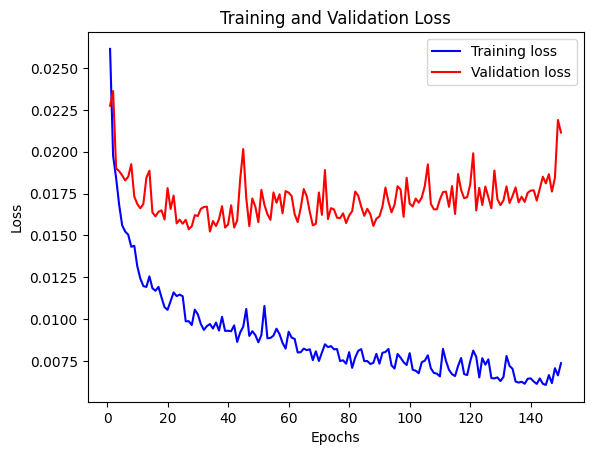

In [5]:
params = {
    "SEED": 1000,
    "model_type": "mlp-mlc-sm",
    "hidden_size": 256,
    "batch_size": 32,
    "num_epochs": 150,
    "learning_rate": 0.000005,
    "save": True,
    "verbose": False
}

model_sm, hist_sm, res_sm = model_train_suite(params)

Loaded data splits
X_train shape: (566, 60936)
Y_train shape: (566, 4)
X_calibration shape: (121, 60936)
Y_calibration shape: (121, 4)
X_test shape: (122, 60936)
Y_test shape: (122, 4)
Using device cuda
Params: 
{'SEED': 1001, 'model_type': 'mlp-mlc-sm', 'hidden_size': 256, 'batch_size': 32, 'num_epochs': 150, 'learning_rate': 5e-06, 'save': True, 'verbose': False}
MlpMlcSm(
  (fc1): Linear(in_features=60936, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)
saving to ckpts/mlp-mlc-sm-2024-04-18-23:51.pth
	[Evaluation on training data...]
Hamming Loss: 0.08480565371024736
Accuracy Score: 0.784452296819788
F1 Score (micro): 0.8870588235294118
F1 Score (macro): 0.8744216545487891
Jaccard Score (average='samples'): 0.4704063604240283
Jaccard Score (average='macro'): 0.7836435426109338
Jaccard Score (average='micro'): 0.7970401691331924
Jaccard Score (average=None): [0.95238095 0.787162

/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


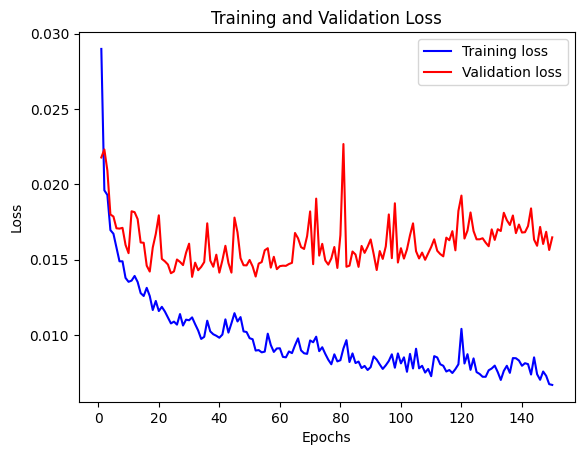

In [9]:
params = {
    "SEED": 1001,
    "model_type": "mlp-mlc-sm",
    "hidden_size": 256,
    "batch_size": 32,
    "num_epochs": 150,
    "learning_rate": 0.000005,
    "save": True,
    "verbose": False
}

model_sm_2, hist_sm_2, res_sm_2 = model_train_suite(params)

Loaded data splits
X_train shape: (566, 60936)
Y_train shape: (566, 4)
X_calibration shape: (121, 60936)
Y_calibration shape: (121, 4)
X_test shape: (122, 60936)
Y_test shape: (122, 4)
Using device cuda
Params: 
{'SEED': 1000, 'model_type': 'mlp-mlc-md', 'hidden_size': 256, 'batch_size': 32, 'num_epochs': 150, 'learning_rate': 5e-06, 'save': True, 'verbose': False}
MlpMlcMd(
  (fc1): Linear(in_features=60936, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=4, bias=True)
)
saving to ckpts/mlp-mlc-md-2024-04-18-23:46.pth
	[Evaluation on training data...]
Hamming Loss: 0.0803886925795053
Accuracy Score: 0.7703180212014135
F1 Score (micro): 0.8875154511742892
F1 Score (macro): 0.8525701190413495
Jaccard Score (average='samples'): 0.4620141342756184
Jaccard Score (average='macro'

/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hamming Loss: 0.17148760330578514
Accuracy Score: 0.5867768595041323
F1 Score (micro): 0.764872521246459
F1 Score (macro): 0.7157021731058726
Jaccard Score (average='samples'): 0.3794765840220386
Jaccard Score (average='macro'): 0.5826224982746722
Jaccard Score (average='micro'): 0.6192660550458715
Jaccard Score (average=None): [0.80952381 0.62318841 0.62       0.27777778]
Precision (macro): 0.7362808191965458
Precision (micro): 0.7714285714285715
Recall (micro): 0.7584269662921348
Recall (macro): 0.7121975725424001
Zero-One Loss (normalized): 0.4132231404958677
	[Evaluation on testing data...]
Hamming Loss: 0.19057377049180327
Accuracy Score: 0.5245901639344263
F1 Score (micro): 0.7304347826086955
F1 Score (macro): 0.6762761077493656
Jaccard Score (average='samples'): 0.3251366120218579
Jaccard Score (average='macro'): 0.5429308989893452
Jaccard Score (average='micro'): 0.5753424657534246
Jaccard Score (average=None): [0.78688525 0.57971014 0.6        0.20512821]
Precision (macro): 0.

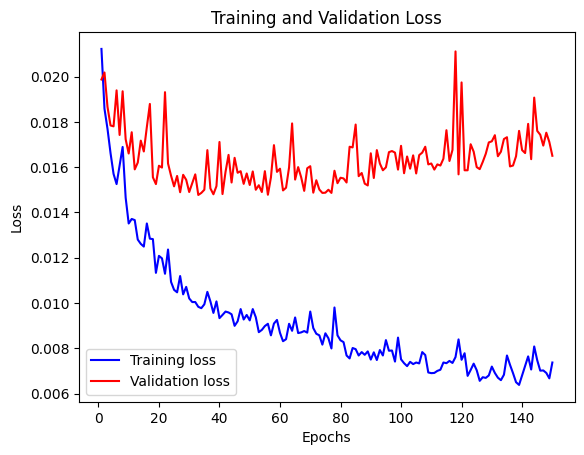

In [6]:
params = {
    "SEED": 1000,
    "model_type": "mlp-mlc-md",
    "hidden_size": 256,
    "batch_size": 32,
    "num_epochs": 150,
    "learning_rate": 0.000005,
    "save": True,
    "verbose": False
}

model_md, hist_md, res_md = model_train_suite(params)

Loaded data splits
X_train shape: (566, 60936)
Y_train shape: (566, 4)
X_calibration shape: (121, 60936)
Y_calibration shape: (121, 4)
X_test shape: (122, 60936)
Y_test shape: (122, 4)
Using device cuda
Params: 
{'SEED': 1001, 'model_type': 'mlp-mlc-md', 'hidden_size': 256, 'batch_size': 32, 'num_epochs': 150, 'learning_rate': 5e-06, 'save': True, 'verbose': False}
MlpMlcMd(
  (fc1): Linear(in_features=60936, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=4, bias=True)
)
saving to ckpts/mlp-mlc-md-2024-04-18-23:55.pth
	[Evaluation on training data...]


/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hamming Loss: 0.09319787985865724
Accuracy Score: 0.7614840989399293
F1 Score (micro): 0.8711056811240073
F1 Score (macro): 0.857468629925362
Jaccard Score (average='samples'): 0.44861601884570074
Jaccard Score (average='macro'): 0.7575681032822038
Jaccard Score (average='micro'): 0.7716450216450217
Jaccard Score (average=None): [0.93385214 0.77173913 0.69339623 0.63128492]
Precision (macro): 0.8602922925784008
Precision (micro): 0.8748466257668711
Recall (micro): 0.8673965936739659
Recall (macro): 0.8595321339364286
Zero-One Loss (normalized): 0.2385159010600707
	[Evaluation on calibration data...]
Hamming Loss: 0.18801652892561985
Accuracy Score: 0.5206611570247934
F1 Score (micro): 0.7493112947658401
F1 Score (macro): 0.7107895272793103
Jaccard Score (average='samples'): 0.3402203856749311
Jaccard Score (average='macro'): 0.5756009615384615
Jaccard Score (average='micro'): 0.5991189427312775
Jaccard Score (average=None): [0.84375    0.64615385 0.5        0.3125    ]
Precision (macro

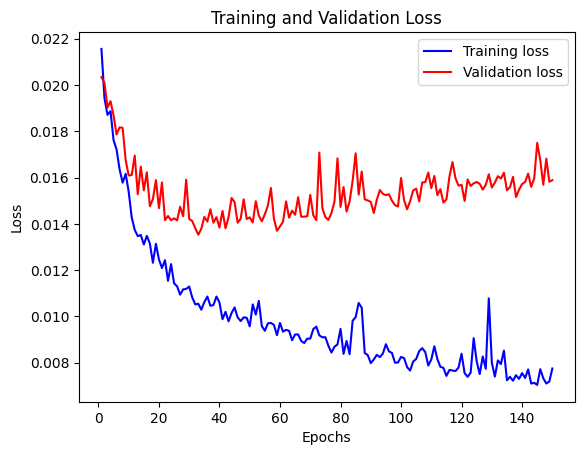

In [11]:
params = {
    "SEED": 1001,
    "model_type": "mlp-mlc-md",
    "hidden_size": 256,
    "batch_size": 32,
    "num_epochs": 150,
    "learning_rate": 0.000005,
    "save": True,
    "verbose": False
}

model_md_2, hist_md_2, res_md_2 = model_train_suite(params)

Loaded data splits
X_train shape: (566, 60936)
Y_train shape: (566, 4)
X_calibration shape: (121, 60936)
Y_calibration shape: (121, 4)
X_test shape: (122, 60936)
Y_test shape: (122, 4)
Using device cuda
Params: 
{'SEED': 1000, 'model_type': 'mlp-mlc-lg', 'hidden_size': 256, 'batch_size': 32, 'num_epochs': 150, 'learning_rate': 5e-06, 'save': True, 'verbose': False}
MlpMlcLg(
  (fc1): Linear(in_features=60936, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=256, bias=True)
  (fc7): Linear(in_features=256, out_features=128, bias=True)
  (fc8): Linear(in_features=128, out_features=4, bias=True)
)
saving to ckpts/mlp-mlc-lg-2024-04-18-23:49.pth
	[Evaluation on training data...]
Hamming Loss: 0.09231448763250884
Accura

/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


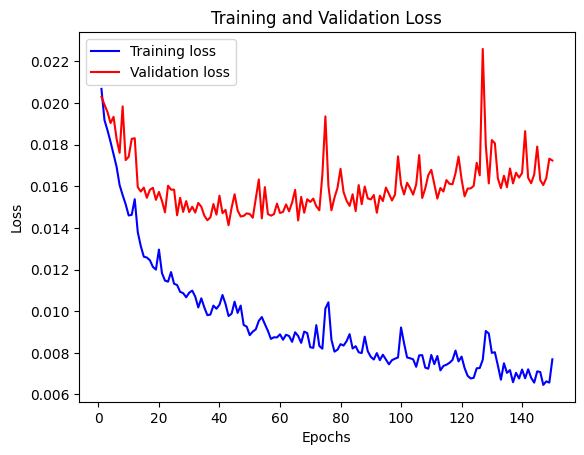

In [7]:
params = {
    "SEED": 1000,
    "model_type": "mlp-mlc-lg",
    "hidden_size": 256,
    "batch_size": 32,
    "num_epochs": 150,
    "learning_rate": 0.000005,
    "save": True,
    "verbose": False
}

model_lg, hist_lg, res_lg = model_train_suite(params)

Loaded data splits
X_train shape: (566, 60936)
Y_train shape: (566, 4)
X_calibration shape: (121, 60936)
Y_calibration shape: (121, 4)
X_test shape: (122, 60936)
Y_test shape: (122, 4)
Using device cuda
Params: 
{'SEED': 1001, 'model_type': 'mlp-mlc-lg', 'hidden_size': 256, 'batch_size': 32, 'num_epochs': 150, 'learning_rate': 5e-06, 'save': True, 'verbose': False}
MlpMlcLg(
  (fc1): Linear(in_features=60936, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=256, bias=True)
  (fc7): Linear(in_features=256, out_features=128, bias=True)
  (fc8): Linear(in_features=128, out_features=4, bias=True)
)
saving to ckpts/mlp-mlc-lg-2024-04-18-23:57.pth
	[Evaluation on training data...]
Hamming Loss: 0.09319787985865724
Accura

/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


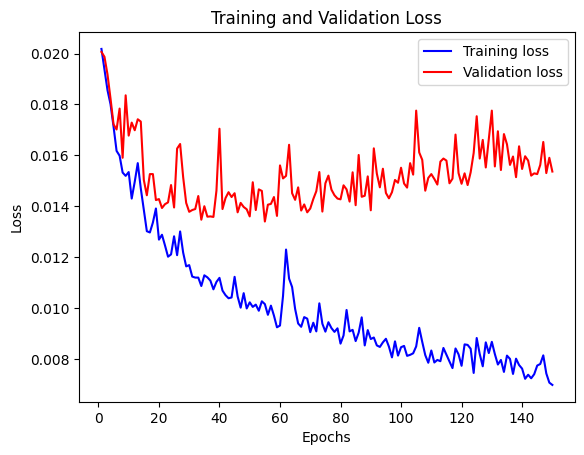

In [12]:
params = {
    "SEED": 1001,
    "model_type": "mlp-mlc-lg",
    "hidden_size": 256,
    "batch_size": 32,
    "num_epochs": 150,
    "learning_rate": 0.000005,
    "save": True,
    "verbose": False
}

model_lg_2, hist_lg_2, res_lg_2 = model_train_suite(params)

In [15]:
def cp_fnr_setup(model, SEED, alpha=0.1)
    
    X_train, Y_train, X_calibration, Y_calibration, X_test, Y_test = load_data_splits(SEED=SEED)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    pred_raw = model(torch.tensor(X_calibration, dtype=torch.float32).to(device))
    cal_sgmd = np.round(pred_raw.detach().cpu().numpy(), decimals=5)
    cal_labels = Y_calibration
    pred_raw = model(torch.tensor(X_test, dtype=torch.float32).to(device))
    val_sgmd = np.round(pred_raw.detach().cpu().numpy(), decimals=5)
    val_labels = Y_test

    n = len(X_calibration)
    # Run the conformal risk control procedure
    def lamhat_threshold(lam): return fnr_weighted(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/(n+1))
    lamhat = brentq(lamhat_threshold, 0.0001, 0.9999)
    # prediction_sets = val_sgmd >= lamhat
    
    prediction_sets = val_sgmd >= lamhat
    # Calculate empirical FNR
    print(f"The empirical FNR is: {fnr_weighted(prediction_sets, val_labels)} and the threshold value is: {lamhat}")
    
    eval_metrics(Y_test, prediction_sets)

Loaded data splits
X_train shape: (566, 60936)
Y_train shape: (566, 4)
X_calibration shape: (121, 60936)
Y_calibration shape: (121, 4)
X_test shape: (122, 60936)
Y_test shape: (122, 4)
pred cal <class 'numpy.ndarray'> (121, 4)
true cal <class 'numpy.ndarray'> (121, 4)
pred val <class 'numpy.ndarray'> (122, 4)
true val <class 'numpy.ndarray'> (122, 4)


In [26]:
from scipy.optimize import brentq
alpha = 0.05
n = len(X_calibration)
# Run the conformal risk control procedure
def lamhat_threshold(lam): return fnr_weighted(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/(n+1))
lamhat = brentq(lamhat_threshold, 0.0001, 0.9999)
# prediction_sets = val_sgmd >= lamhat

prediction_sets = val_sgmd >= lamhat
# Calculate empirical FNR
print(f"The empirical FNR is: {fnr_weighted(prediction_sets, val_labels)} and the threshold value is: {lamhat}")

eval_metrics(Y_test, prediction_sets)

The empirical FNR is: 0.03428571428571429 and the threshold value is: 0.05457000248154515
Hamming Loss: 0.3790983606557377
Accuracy Score: 0.22131147540983606
F1 Score (micro): 0.6462715105162523
F1 Score (macro): 0.6545146986022898
Jaccard Score (average='samples'): 0.3920765027322405
Jaccard Score (average='macro'): 0.49916778186684513
Jaccard Score (average='micro'): 0.4774011299435028
Jaccard Score (average=None): [0.75       0.43442623 0.39795918 0.41428571]
Precision (macro): 0.513026619994707
Precision (micro): 0.48563218390804597
Recall (micro): 0.9657142857142857
Recall (macro): 0.9618566176470589
Zero-One Loss (normalized): 0.7786885245901639


{'Hamming Loss': 0.3790983606557377,
 'Accuracy Score': 0.22131147540983606,
 'F1 Score (micro)': 0.6462715105162523,
 'F1 Score (macro)': 0.6545146986022898,
 "Jaccard Score (average='samples')": 0.3920765027322405,
 "Jaccard Score (average='macro')": 0.49916778186684513,
 "Jaccard Score (average='micro')": 0.4774011299435028,
 'Jaccard Score (average=None)': array([0.75      , 0.43442623, 0.39795918, 0.41428571]),
 'Precision (macro)': 0.513026619994707,
 'Precision (micro)': 0.48563218390804597,
 'Recall (micro)': 0.9657142857142857,
 'Recall (macro)': 0.9618566176470589,
 'Zero-One Loss (normalized)': 0.7786885245901639}

In [22]:
from scipy.optimize import brentq
alpha = 0.1
n = len(X_calibration)
# Run the conformal risk control procedure
def lamhat_threshold(lam): return fnr_weighted(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/(n+1))
lamhat = brentq(lamhat_threshold, 0.0001, 0.9999)
# prediction_sets = val_sgmd >= lamhat

prediction_sets = val_sgmd >= lamhat
# Calculate empirical FNR
print(f"The empirical FNR is: {fnr_weighted(prediction_sets, val_labels)} and the threshold value is: {lamhat}")

eval_metrics(Y_test, prediction_sets)

The empirical FNR is: 0.08571428571428572 and the threshold value is: 0.17474000900944175
Hamming Loss: 0.32991803278688525
Accuracy Score: 0.23770491803278687
F1 Score (micro): 0.6652806652806653
F1 Score (macro): 0.6685075942317362
Jaccard Score (average='samples'): 0.37636612021857924
Jaccard Score (average='macro'): 0.5130274046940713
Jaccard Score (average='micro'): 0.4984423676012461
Jaccard Score (average=None): [0.74603175 0.45299145 0.41975309 0.43333333]
Precision (macro): 0.5446128812542729
Precision (micro): 0.5228758169934641
Recall (micro): 0.9142857142857143
Recall (macro): 0.901465874811463
Zero-One Loss (normalized): 0.7622950819672132


/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Hamming Loss': 0.32991803278688525,
 'Accuracy Score': 0.23770491803278687,
 'F1 Score (micro)': 0.6652806652806653,
 'F1 Score (macro)': 0.6685075942317362,
 "Jaccard Score (average='samples')": 0.37636612021857924,
 "Jaccard Score (average='macro')": 0.5130274046940713,
 "Jaccard Score (average='micro')": 0.4984423676012461,
 'Jaccard Score (average=None)': array([0.74603175, 0.45299145, 0.41975309, 0.43333333]),
 'Precision (macro)': 0.5446128812542729,
 'Precision (micro)': 0.5228758169934641,
 'Recall (micro)': 0.9142857142857143,
 'Recall (macro)': 0.901465874811463,
 'Zero-One Loss (normalized)': 0.7622950819672132}

In [23]:
from scipy.optimize import brentq
alpha = 0.15
n = len(X_calibration)
# Run the conformal risk control procedure
def lamhat_threshold(lam): return fnr_weighted(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/(n+1))
lamhat = brentq(lamhat_threshold, 0.0001, 0.9999)
# prediction_sets = val_sgmd >= lamhat

prediction_sets = val_sgmd >= lamhat
# Calculate empirical FNR
print(f"The empirical FNR is: {fnr_weighted(prediction_sets, val_labels)} and the threshold value is: {lamhat}")

eval_metrics(Y_test, prediction_sets)

The empirical FNR is: 0.1142857142857143 and the threshold value is: 0.37499000132078253
Hamming Loss: 0.26024590163934425
Accuracy Score: 0.30327868852459017
F1 Score (micro): 0.7093821510297482
F1 Score (macro): 0.7102063402970099
Jaccard Score (average='samples'): 0.3756830601092896
Jaccard Score (average='macro'): 0.5620600366247082
Jaccard Score (average='micro'): 0.549645390070922
Jaccard Score (average=None): [0.79661017 0.47706422 0.53225806 0.44230769]
Precision (macro): 0.6150490928107207
Precision (micro): 0.5916030534351145
Recall (micro): 0.8857142857142857
Recall (macro): 0.8669011372691312
Zero-One Loss (normalized): 0.6967213114754098


/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Hamming Loss': 0.26024590163934425,
 'Accuracy Score': 0.30327868852459017,
 'F1 Score (micro)': 0.7093821510297482,
 'F1 Score (macro)': 0.7102063402970099,
 "Jaccard Score (average='samples')": 0.3756830601092896,
 "Jaccard Score (average='macro')": 0.5620600366247082,
 "Jaccard Score (average='micro')": 0.549645390070922,
 'Jaccard Score (average=None)': array([0.79661017, 0.47706422, 0.53225806, 0.44230769]),
 'Precision (macro)': 0.6150490928107207,
 'Precision (micro)': 0.5916030534351145,
 'Recall (micro)': 0.8857142857142857,
 'Recall (macro)': 0.8669011372691312,
 'Zero-One Loss (normalized)': 0.6967213114754098}

In [24]:
from scipy.optimize import brentq
alpha = 0.2
n = len(X_calibration)
# Run the conformal risk control procedure
def lamhat_threshold(lam): return fnr_weighted(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/(n+1))
lamhat = brentq(lamhat_threshold, 0.0001, 0.9999)
# prediction_sets = val_sgmd >= lamhat

prediction_sets = val_sgmd >= lamhat
# Calculate empirical FNR
print(f"The empirical FNR is: {fnr_weighted(prediction_sets, val_labels)} and the threshold value is: {lamhat}")

eval_metrics(Y_test, prediction_sets)

The empirical FNR is: 0.1657142857142857 and the threshold value is: 0.5211000144475895
Hamming Loss: 0.2459016393442623
Accuracy Score: 0.319672131147541
F1 Score (micro): 0.7087378640776699
F1 Score (macro): 0.693482905982906
Jaccard Score (average='samples'): 0.35860655737704916
Jaccard Score (average='macro'): 0.5507040384211761
Jaccard Score (average='micro'): 0.5488721804511278
Jaccard Score (average=None): [0.8245614  0.5        0.55172414 0.32653061]
Precision (macro): 0.6272729795177076
Precision (micro): 0.6160337552742616
Recall (micro): 0.8342857142857143
Recall (macro): 0.8010863997267992
Zero-One Loss (normalized): 0.680327868852459


/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Hamming Loss': 0.2459016393442623,
 'Accuracy Score': 0.319672131147541,
 'F1 Score (micro)': 0.7087378640776699,
 'F1 Score (macro)': 0.693482905982906,
 "Jaccard Score (average='samples')": 0.35860655737704916,
 "Jaccard Score (average='macro')": 0.5507040384211761,
 "Jaccard Score (average='micro')": 0.5488721804511278,
 'Jaccard Score (average=None)': array([0.8245614 , 0.5       , 0.55172414, 0.32653061]),
 'Precision (macro)': 0.6272729795177076,
 'Precision (micro)': 0.6160337552742616,
 'Recall (micro)': 0.8342857142857143,
 'Recall (macro)': 0.8010863997267992,
 'Zero-One Loss (normalized)': 0.680327868852459}

In [25]:
from scipy.optimize import brentq
alpha = 0.25
n = len(X_calibration)
# Run the conformal risk control procedure
def lamhat_threshold(lam): return fnr_weighted(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/(n+1))
lamhat = brentq(lamhat_threshold, 0.0001, 0.9999)
# prediction_sets = val_sgmd >= lamhat

prediction_sets = val_sgmd >= lamhat
# Calculate empirical FNR
print(f"The empirical FNR is: {fnr_weighted(prediction_sets, val_labels)} and the threshold value is: {lamhat}")

eval_metrics(Y_test, prediction_sets)

The empirical FNR is: 0.2571428571428571 and the threshold value is: 0.6314200460903285
Hamming Loss: 0.2336065573770492
Accuracy Score: 0.3442622950819672
F1 Score (micro): 0.6951871657754012
F1 Score (macro): 0.6536638059479112
Jaccard Score (average='samples'): 0.3319672131147541
Jaccard Score (average='macro'): 0.5185787652892916
Jaccard Score (average='micro'): 0.5327868852459017
Jaccard Score (average=None): [0.82142857 0.47368421 0.57407407 0.20512821]
Precision (macro): 0.6566121351089161
Precision (micro): 0.6532663316582915
Recall (micro): 0.7428571428571429
Recall (macro): 0.6989722957397763
Zero-One Loss (normalized): 0.6557377049180328


/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Hamming Loss': 0.2336065573770492,
 'Accuracy Score': 0.3442622950819672,
 'F1 Score (micro)': 0.6951871657754012,
 'F1 Score (macro)': 0.6536638059479112,
 "Jaccard Score (average='samples')": 0.3319672131147541,
 "Jaccard Score (average='macro')": 0.5185787652892916,
 "Jaccard Score (average='micro')": 0.5327868852459017,
 'Jaccard Score (average=None)': array([0.82142857, 0.47368421, 0.57407407, 0.20512821]),
 'Precision (macro)': 0.6566121351089161,
 'Precision (micro)': 0.6532663316582915,
 'Recall (micro)': 0.7428571428571429,
 'Recall (macro)': 0.6989722957397763,
 'Zero-One Loss (normalized)': 0.6557377049180328}

In [ ]:
from scipy.optimize import brentq
alpha = 0.1
n = len(X_calibration)
# Run the conformal risk control procedure
def lamhat_threshold(lam): return fnr_weighted(cal_sgmd>=lam, cal_labels) - ((n+1)/n*alpha - 1/(n+1))
lamhat = brentq(lamhat_threshold, 0.0001, 0.9999)
# prediction_sets = val_sgmd >= lamhat

prediction_sets = val_sgmd >= lamhat
# Calculate empirical FNR
print(f"The empirical FNR is: {fnr_weighted(prediction_sets, val_labels)} and the threshold value is: {lamhat}")

eval_metrics(Y_test, prediction_sets)

## How to load model and assess

In [35]:
# model_loaded = torch.load('model-baseline-mlp-2024-04-13-14:44.pth')

model_loaded = DeepMultiLabelClassifier(input_size, hidden_size, output_size).to(device)
model_loaded.load_state_dict(torch.load('model-baseline-mlp-2024-04-13-14:35.pth'))
model_loaded.eval()

DeepMultiLabelClassifier(
  (fc1): Linear(in_features=60936, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=4, bias=True)
)

In [36]:
print("\t[Evaluation on training data...]")
pred_raw = model_loaded(torch.tensor(X_train, dtype=torch.float32).to(device))
pred = torch.round(pred_raw)
eval_metrics(Y_train, pred.to("cpu").detach().numpy())

print("\t[Evaluation on calibration data...]")
pred_raw = model_loaded(torch.tensor(X_calibration, dtype=torch.float32).to(device))
pred = torch.round(pred_raw)
eval_metrics(Y_calibration, pred.to("cpu").detach().numpy())

print("\t[Evaluation on testing data...]")
pred_raw = model_loaded(torch.tensor(X_test, dtype=torch.float32).to(device))
pred = torch.round(pred_raw)
eval_metrics(Y_test, pred.to("cpu").detach().numpy())

	[Evaluation on training data...]
Hamming Loss: 0.07464664310954064
Accuracy Score: 0.7791519434628975
F1 Score (micro): 0.8991044776119402
F1 Score (macro): 0.8890969944161433
Jaccard Score (average='samples'): 0.4702591283863368
Jaccard Score (average='macro'): 0.8037310045357315
Jaccard Score (average='micro'): 0.8167028199566161
Jaccard Score (average=None): [0.90384615 0.83098592 0.79146919 0.68862275]
Precision (macro): 0.8859468339307051
Precision (micro): 0.8964285714285715
Recall (micro): 0.9017964071856287
Recall (macro): 0.8991980770760297
Zero-One Loss (normalized): 0.2208480565371025
	[Evaluation on calibration data...]
Hamming Loss: 0.19834710743801653
Accuracy Score: 0.512396694214876
F1 Score (micro): 0.7362637362637361
F1 Score (macro): 0.7107447983413038
Jaccard Score (average='samples'): 0.3340220385674931
Jaccard Score (average='macro'): 0.5667875009620565
Jaccard Score (average='micro'): 0.5826086956521739
Jaccard Score (average=None): [0.75409836 0.61971831 0.56  

/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/burg/home/by

[0.18237704918032788,
 0.5655737704918032,
 0.7520891364902508,
 0.7319022228312322,
 0.32786885245901637,
 0.5936224489795918,
 0.6026785714285714,
 array([0.82142857, 0.61428571, 0.57142857, 0.36734694]),
 0.7174388176323161,
 0.7336956521739131,
 0.7714285714285715,
 0.7484325642448562,
 0.43442622950819676]

In [39]:
X_train[0][:100]

array([2, 1, 2, 4, 3, 3, 3, 3, 4, 2, 2, 2, 2, 2, 4, 0, 1, 4, 4, 2, 3, 2,
       4, 1, 2, 3, 3, 0, 3, 3, 2, 3, 4, 4, 1, 3, 1, 2, 3, 3, 3, 4, 3, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 4, 2, 2, 3, 2, 2, 3, 3, 4, 4, 2, 2, 1,
       3, 4, 4, 3, 2, 2, 2, 1, 2, 1, 3, 2, 4, 2, 3, 3, 1, 2, 2, 3, 2, 4,
       2, 1, 1, 2, 1, 2, 2, 4, 4, 4, 3, 3])

In [40]:
unique_elements, counts = np.unique(X_train[0], return_counts=True)

# Print value counts
for value, count in zip(unique_elements, counts):
    print(f"{value}: {count}")

0: 310
1: 10536
2: 20171
3: 20060
4: 9859


In [45]:
unique_elements, counts = np.unique(X_train[5], return_counts=True)

# Print value counts
for value, count in zip(unique_elements, counts):
    print(f"{value}: {count}")

0: 2072
1: 10181
2: 19672
3: 19489
4: 9522


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

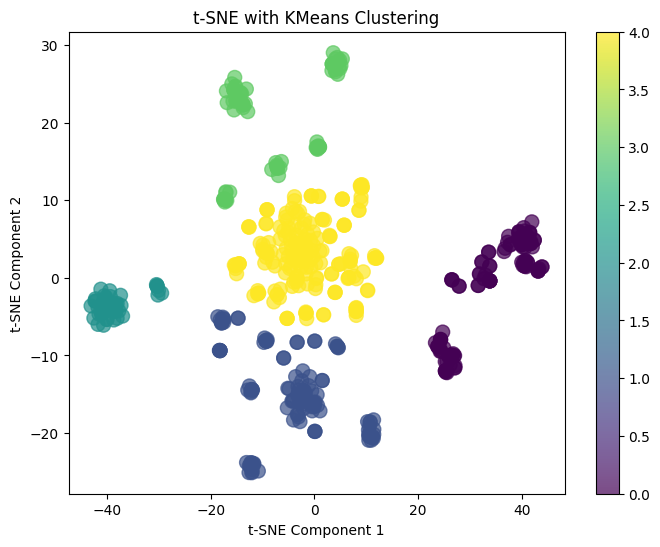

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Generate some sample data


# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_tsne)

# Get cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)
plt.title('t-SNE with KMeans Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()


/burg/home/bys2107/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the librar

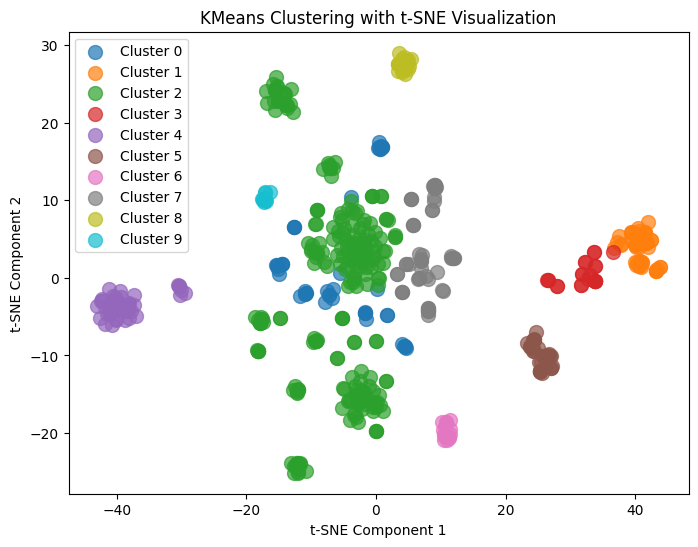

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Perform KMeans clustering on the original data
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_train)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    plt.scatter(X_tsne[labels == label, 0], X_tsne[labels == label, 1], label=f'Cluster {label}', s=100, alpha=0.7)
plt.title('KMeans Clustering with t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [55]:
len(X_train) + len(X_calibration) + len(X_test)

809

In [56]:
1+1

2